In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# reading "btc_final.csv" file
df = pd.read_csv("btc_final.csv" , index_col=0)
df.head()

,Time,BTC / Realized Market Cap (USD),BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap),BTC / MVRV (Market Cap / Realized Market Cap),BTC / 30 Day Volatility,"BTC / ROI, 30 Days",BTC / Coinbase Issuance (native units),BTC / Coinbase Issuance (USD),BTC / 1 Day Active Supply,BTC / 7 Day Active Supply,...,price_open_lag_10,price_high_lag_10,price_low_lag_10,volume_lag_10,candle_usd_volume_lag_10,candle_trades_count_lag_10,BTC / Exchange net flows (USD) _lag_10,BTC_daily_price_range_lag_10,BTC_price_lag_10,BTC_price
11,2015-01-02 00:00:00+00:00,4.380329e+09,0.907480,0.986687,0.024736,-15.953906,4125.0,1.303264e+06,137663.405201,651008.473937,...,340.0,340.0,340.0,0.0,0.0,0.0,-1.878642e+07,-0.0,340.0,340.0
12,2015-01-03 00:00:00+00:00,4.370060e+09,0.822495,0.894436,0.030157,-22.556394,4050.0,1.156872e+06,257074.146156,709671.907761,...,340.0,340.0,340.0,0.0,0.0,0.0,2.194611e+06,-0.0,340.0,340.0
13,2015-01-04 00:00:00+00:00,4.362259e+09,0.759694,0.826303,0.032231,-30.413620,4300.0,1.132339e+06,293260.380176,752020.561493,...,340.0,340.0,340.0,0.0,0.0,0.0,3.149142e+06,-0.0,340.0,340.0
14,2015-01-05 00:00:00+00:00,4.354468e+09,0.794828,0.864709,0.033784,-26.692607,3900.0,1.072515e+06,302023.678992,796504.613354,...,340.0,340.0,340.0,0.0,0.0,0.0,-2.298005e+06,-0.0,340.0,340.0
15,2015-01-06 00:00:00+00:00,4.355354e+09,0.831005,0.904234,0.035164,-23.653972,3950.0,1.135821e+06,300744.915429,825215.006047,...,340.0,340.0,340.0,0.0,0.0,0.0,-2.406265e+05,-0.0,340.0,340.0


In [ ]:
# dropping "Time" column
df_final=df.drop('Time',axis=1)

In [ ]:
# checking the dataFrame shape
df_final.shape

(2645, 856)

In [ ]:
correlation = df_final.corr()

In [ ]:
# keeping the features that has a high correlation with our target
correlation_threshold = 0.4

positive_correlation = correlation[correlation['BTC_price']>=correlation_threshold].sort_values('BTC_price',ascending=False)['BTC_price']
negative_correlation = correlation[correlation['BTC_price']<=-correlation_threshold].sort_values('BTC_price',ascending=True)['BTC_price']

In [ ]:
display(positive_correlation)
print('\n','number of positively correlated features with btc price' , len(positive_correlation))

BTC_price                                                                    1.000000
price_high                                                                   0.999475
price_low                                                                    0.999311
price_open                                                                   0.998794
BTC_price_lag_1                                                              0.998794
                                                                               ...   
BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)_lag_1    0.425089
BTC / Difficulty_roll_std14                                                  0.424540
BTC / Free Float MVRV (Free Float Market Cap / Realized Market Cap)          0.424331
BTC / NVT_MA14                                                               0.418742
BTC / NVT_MA7                                                                0.407072
Name: BTC_price, Length: 323, dtype: float64


 number of positively correlated features with btc price 323


In [ ]:
display(negative_correlation)
print('\n','number of negatively correlated features with btc price' , len(negative_correlation))

BTC / Realized Market Cap (USD)_diff_roll_std7_roll_std21   -0.651528
BTC / Coinbase Issuance (native units)_MA21                 -0.636356
BTC / Coinbase Issuance (native units)_MA14                 -0.633189
BTC / Coinbase Issuance (native units)_MA7                  -0.629514
BTC / Coinbase Issuance (native units)_lag_10               -0.621650
                                                               ...   
price_low_diff_roll_std14_roll_std21                        -0.454270
price_high_diff_roll_std14_roll_std21                       -0.449460
BTC_price_diff_roll_std14_roll_std21                        -0.448123
price_open_diff_roll_std14_roll_std21                       -0.447897
BTC / Exchange net flows (USD) _MA21                        -0.410338
Name: BTC_price, Length: 64, dtype: float64


 number of negatively correlated features with btc price 64


In [ ]:
df_final = df_final[list(positive_correlation.index.values)+list(negative_correlation.index.values)]

In [ ]:
# let's replace BTC_price in the last position again
target = df_final.pop('BTC_price')
df_final = pd.concat([df_final,target],axis=1)

# defining Random Forest Algorithm parameters

using Random Forest algorithm in Scikit-Learn package: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) 

In [ ]:
# setting the variables (from record 1 to n-1)
X = df_final.iloc[:-1,0:-1]
X.shape

(2644, 386)

In [ ]:
# setting the target (from record 2 to n)
Y = df_final.iloc[1:,-1:]
Y.shape

(2644, 1)

### Choosing best n_estimators value

Some of the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) parameters:
 - **n_estimators** : number of trees that are used
 - **bootstrap** : Boolean value to wether or not use boostrapping, if False all the trees are going to use the same dataset.  
 - **oob_score** : Choice to use out-of-bag samples to calculate the average score of the predictions (only usable if the bootstrap option is activated)
 - **max_sample** : If the bootstrap is activated, allows to choose the number of samples to take in the initial dataset to build each estimator.  
 - **max_features** : The number of data taken randomly to cut out a node of the tree (mtry)

We start by looking at how the OOB score evolves over  40 trials with an increasing number of trees, while keeping a default value of mtry (square root of the number of variables in classification and number of variables divided by 3 in regression). We will choose the number of trees such that it is minimal and that the OOB score is stabilized. 

In [ ]:
# Data information
n = X.shape[0]              # number of records
p = X.shape[1]                # number of variables

n_trees_max = 5000

n_trees = np.linspace(50,n_trees_max,40).astype(np.int32)
mtry = p/3
OOB_err = []

for i in n_trees:
  print("#Trees : %d" %i)
  clf = RandomForestRegressor(n_estimators=i, bootstrap=True, oob_score=True, max_samples = n, max_features = int(mtry), n_jobs=-1)
  clf.fit(X,tf.squeeze(np.asarray(Y),1))
  OOB_err.append(1 - clf.oob_score_)

#Trees : 50
#Trees : 176
#Trees : 303
#Trees : 430
#Trees : 557
#Trees : 684
#Trees : 811
#Trees : 938
#Trees : 1065
#Trees : 1192
#Trees : 1319
#Trees : 1446
#Trees : 1573
#Trees : 1700
#Trees : 1826
#Trees : 1953
#Trees : 2080
#Trees : 2207
#Trees : 2334
#Trees : 2461
#Trees : 2588
#Trees : 2715
#Trees : 2842
#Trees : 2969
#Trees : 3096
#Trees : 3223
#Trees : 3350
#Trees : 3476
#Trees : 3603
#Trees : 3730
#Trees : 3857
#Trees : 3984
#Trees : 4111
#Trees : 4238
#Trees : 4365
#Trees : 4492
#Trees : 4619
#Trees : 4746
#Trees : 4873
#Trees : 5000


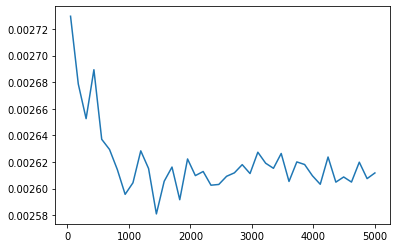

In [ ]:
plt.plot(n_trees,OOB_err)

from 1000 trees OOB_err is stabilizing so this our best n_estimators

### choosing best max_features value

We look at how the OOB score evolves over 40 trials with a number of trees fixed at the value found previously, then by varying the value of mtry from fourth of its default value to its maximum possible. We will choose the value of mtry such that it is minimal and that the OOB score is stabilized.  

In [ ]:
# Data information
n = X.shape[0]              # number of records
p = X.shape[1]                # number of variables

n_trees = 1000
mtry_0 = 2 #np.int32(0.25*(p/3))

m_try = np.linspace(mtry_0,p,50).astype(np.int32)

OOB_err = []

for i in m_try:
   print("mtry = %s" %i)
   clf = RandomForestRegressor(n_estimators=n_trees, bootstrap=True, oob_score=True, max_features=i, n_jobs=-1)
   clf.fit(X,tf.squeeze(np.asarray(Y),1))
   OOB_err.append(1 - clf.oob_score_)

mtry = 2
mtry = 9
mtry = 17
mtry = 25
mtry = 33
mtry = 41
mtry = 49
mtry = 56
mtry = 64
mtry = 72
mtry = 80
mtry = 88
mtry = 96
mtry = 103
mtry = 111
mtry = 119
mtry = 127
mtry = 135
mtry = 143
mtry = 150
mtry = 158
mtry = 166
mtry = 174
mtry = 182
mtry = 190
mtry = 197
mtry = 205
mtry = 213
mtry = 221
mtry = 229
mtry = 237
mtry = 244
mtry = 252
mtry = 260
mtry = 268
mtry = 276
mtry = 284
mtry = 291
mtry = 299
mtry = 307
mtry = 315
mtry = 323
mtry = 331
mtry = 338
mtry = 346
mtry = 354
mtry = 362
mtry = 370
mtry = 378
mtry = 386


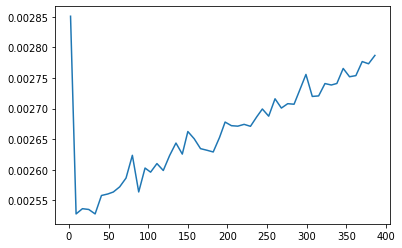

In [ ]:
plt.plot(m_try,OOB_err)

In [ ]:
OOB_error = pd.DataFrame({'n_features':m_try,'OOB':OOB_err})

In [ ]:
OOB_error[OOB_error['OOB']==OOB_error['OOB'].min()]

,n_features,OOB
4,33,0.002528


setting max_features value to 33

# Feature Importance: Importance without permutation (Gini Importance)

**1. Training the Random Forest model**

In [ ]:
from sklearn.inspection import permutation_importance

# Data information
n = X.shape[0]             # number of records
p = X.shape[1]               # number of variables
n_trees = 1000
m_try = 33

clf = RandomForestRegressor(n_estimators=n_trees, bootstrap=True, oob_score=True, max_features=m_try, n_jobs=-1)
clf.fit(X,tf.squeeze(np.asarray(Y),1))

RandomForestRegressor(max_features=33, n_estimators=1000, n_jobs=-1,
                      oob_score=True)

**2. Displaying feature importance**

In [ ]:
col_sorted_by_importance=np.argsort(-clf.feature_importances_)

feat_imp = pd.DataFrame({'cols':X.columns[col_sorted_by_importance],'imps':clf.feature_importances_[col_sorted_by_importance]}).sort_values(['imps'],ascending=False)
feat_imp

,cols,imps
0,price_low,0.024417
1,BTC / Realized Market Cap (USD)_lag_2,0.021107
2,BTC / Val in Addrs w/ Bal ≥ 100 (native units)...,0.021074
3,BTC / Realized Market Cap (USD)_lag_1,0.020288
4,BTC / Realized Market Cap (USD)_MA14,0.020229
...,...,...
381,BTC / Difficulty_lag_4,0.000007
382,BTC / Mean Hash Rate_lag_1,0.000006
383,BTC / Coinbase Issuance (native units)_lag_2,0.000006
384,candle_usd_volume_lag_3,0.000006


In [ ]:
!pip install plotly_express --upgrade -q

In [ ]:
import plotly_express as px
import plotly.offline as po

px.bar(feat_imp[:100], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

the features that we retain with Gini importance are:
- price open
- price low
- price high
- realized market cap
- value in addresses with value over 100 BTC
- value in addresses with value over $1M
- value in addresses with value over 10M

the highest lag we have is 14, so we will build our model's train and test data with a window size of 14 timesteps




In [ ]:
df_selected_GI = df_final[['price_low' , 'price_high' , 'price_open' , 'BTC / Realized Market Cap (USD)' , 
                           'BTC / Val in Addrs w/ Bal ≥ 100 (native units)' , 'BTC / Val in Addrs w/ Bal ≥ $1M USD' ,
                           'BTC / Val in Addrs w/ Bal ≥ $10M USD' , 'BTC_price']]

In [ ]:
df_selected_GI

,price_low,price_high,price_open,BTC / Realized Market Cap (USD),BTC / Val in Addrs w/ Bal ≥ 100 (native units),BTC / Val in Addrs w/ Bal ≥ $1M USD,BTC / Val in Addrs w/ Bal ≥ $10M USD,BTC_price
11,340.00,340.00,340.00,4.380329e+09,9.221014e+06,4.145445e+06,1.924683e+06,340.00
12,340.00,340.00,340.00,4.370060e+09,9.223876e+06,4.051809e+06,1.854669e+06,340.00
13,340.00,340.00,340.00,4.362259e+09,9.235230e+06,4.025844e+06,1.820324e+06,340.00
14,340.00,340.00,340.00,4.354468e+09,9.238207e+06,4.069146e+06,1.825637e+06,340.00
15,340.00,340.00,340.00,4.355354e+09,9.241839e+06,4.107305e+06,1.860647e+06,340.00
...,...,...,...,...,...,...,...,...
2651,44091.09,44820.58,44336.19,4.637621e+11,1.196295e+07,1.540448e+07,1.085518e+07,44539.42
2652,44437.22,46950.00,44538.21,4.645012e+11,1.196435e+07,1.544393e+07,1.090280e+07,46850.01
2653,46662.28,48240.00,46850.01,4.657595e+11,1.196048e+07,1.544759e+07,1.090915e+07,47144.92
2654,46589.00,48124.94,47146.92,4.667479e+11,1.195196e+07,1.544114e+07,1.090427e+07,47454.19


In [ ]:
from google.colab import files

df_selected_GI.to_csv("btc_final_GI.csv")
files.download("btc_final_GI.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Feature importance - permutation Method

The calculation of the importance by the method of permutations is a technique in which one mixes the values of a column in order to observe the impact on the obtained score. If the score is affected a lot, it means that the permuted variable is very important.

we use Scikit-learn methode [permutation_importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X, Y, n_repeats=10,n_jobs=-1)

In [ ]:
scores={c:[] for c in X.columns}
i=0
for c in scores:
  scores[c].append(result.importances_mean[i])
  i = i+1

In [ ]:
feat_perm = pd.DataFrame.from_dict(scores).melt().groupby(['variable'] , as_index=False).mean().sort_values(['value'], ascending=False)

In [ ]:
px.bar(feat_perm[:20], x='variable', y='value',labels={'variable':'column','value':'% change in recall'})

# Comparing both methods

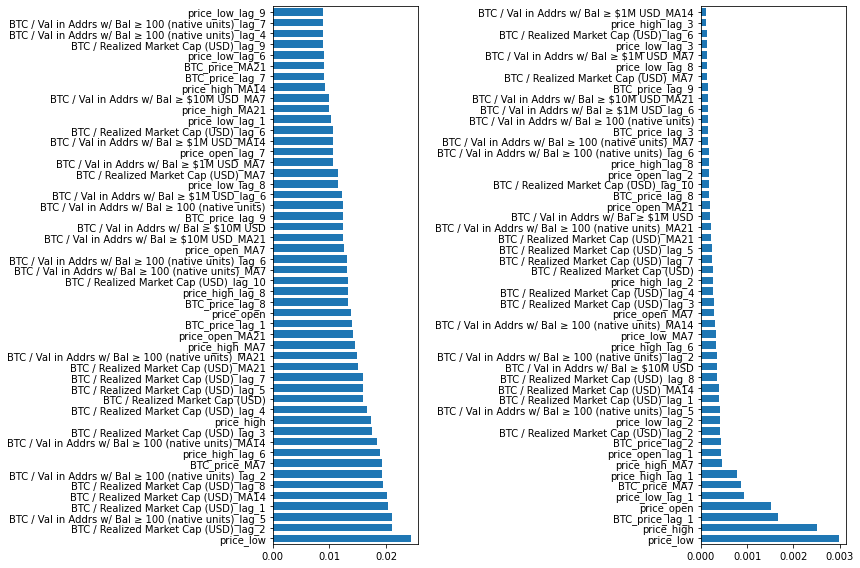

In [ ]:
#feature_perm = pd.DataFrame.from_dict(scores).melt().groupby(['variable']).mean().reset_index().sort_values(['value'], ascending=False)
#feature_imp = feat_imp.sort_values(['imps'],ascending=False)
#feature_imp = feature_imp

feature_number = 50

tree_indices = np.arange(0, len(feat_imp[:feature_number])) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices,feat_imp['imps'][:feature_number].values, height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(feat_imp['cols'][:feature_number].values)
ax1.set_ylim((0, len(feat_imp[:feature_number])))

ax2.barh(tree_indices,feat_perm['value'][:feature_number].values, height=0.7)
ax2.set_yticks(tree_indices)
ax2.set_yticklabels(feat_perm['variable'][:feature_number].values)
ax2.set_ylim((0, len(feat_perm[:feature_number])))

fig.tight_layout()
plt.show()

In [ ]:
# keeping the features that intersect in both diagrams
features_to_keep = list(set(feat_imp['cols'][:feature_number].values).intersection(feat_perm['variable'][:feature_number].values))

In [ ]:
# redefining our new variable X_new
X_new = df_final[features_to_keep].iloc[:-1,:]

In [ ]:
# finding our new best n_estimators with X_new
n_new = X_new.shape[0]
p_new = X_new.shape[1]
n_trees_max = 5000

n_trees = np.linspace(50,n_trees_max,40).astype(np.int32)
mtry = p_new/3
OOB_err = []

for i in n_trees:
  print("#Trees : %d" %i)
  clf = RandomForestRegressor(n_estimators=i, bootstrap=True, oob_score=True, max_samples = n_new, max_features = int(mtry), n_jobs=-1)
  clf.fit(X_new,tf.squeeze(np.asarray(Y),1))
  OOB_err.append(1 - clf.oob_score_)

#Trees : 50
#Trees : 176
#Trees : 303
#Trees : 430
#Trees : 557
#Trees : 684
#Trees : 811
#Trees : 938
#Trees : 1065
#Trees : 1192
#Trees : 1319
#Trees : 1446
#Trees : 1573
#Trees : 1700
#Trees : 1826
#Trees : 1953
#Trees : 2080
#Trees : 2207
#Trees : 2334
#Trees : 2461
#Trees : 2588
#Trees : 2715
#Trees : 2842
#Trees : 2969
#Trees : 3096
#Trees : 3223
#Trees : 3350
#Trees : 3476
#Trees : 3603
#Trees : 3730
#Trees : 3857
#Trees : 3984
#Trees : 4111
#Trees : 4238
#Trees : 4365
#Trees : 4492
#Trees : 4619
#Trees : 4746
#Trees : 4873
#Trees : 5000


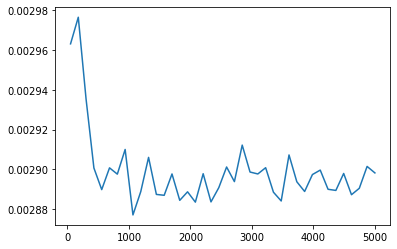

In [ ]:
plt.plot(n_trees,OOB_err)

we choose set the best n_estimators at 684 

In [ ]:
# choosing best max_features for X_new

n_trees = 684
mtry_0 = 2 #np.int32(0.25*(p/3))

m_try = np.unique(np.linspace(mtry_0,p_new,50).astype(np.int32))

OOB_err = []

for i in m_try:
   print("mtry = %s" %i)
   clf = RandomForestRegressor(n_estimators=n_trees, bootstrap=True, oob_score=True, max_features=i, n_jobs=-1)
   clf.fit(X_new,tf.squeeze(np.asarray(Y),1))
   OOB_err.append(1 - clf.oob_score_)

mtry = 2
mtry = 3
mtry = 4
mtry = 5
mtry = 6
mtry = 7
mtry = 8
mtry = 9
mtry = 10
mtry = 11
mtry = 12
mtry = 13
mtry = 14
mtry = 15
mtry = 16
mtry = 17
mtry = 18
mtry = 19
mtry = 20
mtry = 21
mtry = 22
mtry = 23
mtry = 24
mtry = 25
mtry = 26
mtry = 27
mtry = 28
mtry = 29
mtry = 30
mtry = 31
mtry = 32
mtry = 33
mtry = 34
mtry = 35
mtry = 36
mtry = 37
mtry = 38
mtry = 39


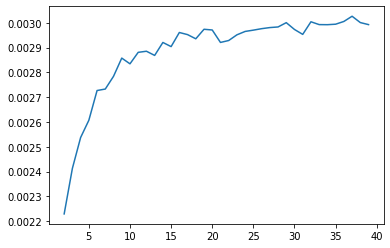

In [ ]:
plt.plot(m_try,OOB_err)

we set best n_features to 2

# Feature selection with RFE-CV method

we use here [RFE-CV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV) (Recursive Feature Elimination with Cross-Validation) to select our final features for training our model.

In [ ]:
from sklearn.feature_selection import RFECV

# Data information
n = X_new.shape[0]            # number of records
p = X_new.shape[1]               # number of variables
n_trees = 684
m_try = 2
min_features_to_select = 4

clf = RandomForestRegressor(n_estimators=n_trees, bootstrap=True, oob_score=True, max_features="auto", n_jobs=-1)
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='neg_mean_absolute_error',min_features_to_select=min_features_to_select, verbose=1)
rfecv.fit(X_new, tf.squeeze(np.asarray(Y),1))

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 fe

RFECV(cv=5,
      estimator=RandomForestRegressor(n_estimators=684, n_jobs=-1,
                                      oob_score=True),
      min_features_to_select=4, scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


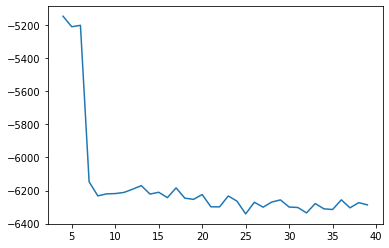

In [ ]:
plt.plot(range(min_features_to_select,len(rfecv.cv_results_['mean_test_score'])+min_features_to_select),rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
rfecv.ranking_

array([36,  5,  1, 32, 16, 20,  9, 34,  6,  2, 23, 10, 28, 26, 12, 19,  3,
       15, 35, 30, 33,  4, 31,  7, 11,  1,  1, 25, 13, 17, 27, 14,  1, 24,
       22, 21, 18,  8, 29])

In [ ]:
selected_rfecv = rfecv.ranking_
df_selected_rfecv = pd.DataFrame()

for i in range(len(X_new.columns)):
  if selected_rfecv[i] == 1:
    df_selected_rfecv[X_new.columns[i]] = X[X_new.columns[i]]

df_selected_rfecv

,price_low,price_high_lag_6,BTC / Val in Addrs w/ Bal ≥ 100 (native units)_lag_5,BTC / Realized Market Cap (USD)_lag_3
11,340.00,340.00,9.208048e+06,4.384641e+09
12,340.00,340.00,9.210982e+06,4.379834e+09
13,340.00,340.00,9.213940e+06,4.380336e+09
14,340.00,340.00,9.213365e+06,4.380329e+09
15,340.00,340.00,9.217233e+06,4.370060e+09
...,...,...,...,...
2650,43605.80,42429.00,1.196181e+07,4.604379e+11
2651,44091.09,42330.10,1.196243e+07,4.607628e+11
2652,44437.22,41578.33,1.196127e+07,4.612691e+11
2653,46662.28,43389.79,1.196192e+07,4.636090e+11


**Corrélation entre les variables**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



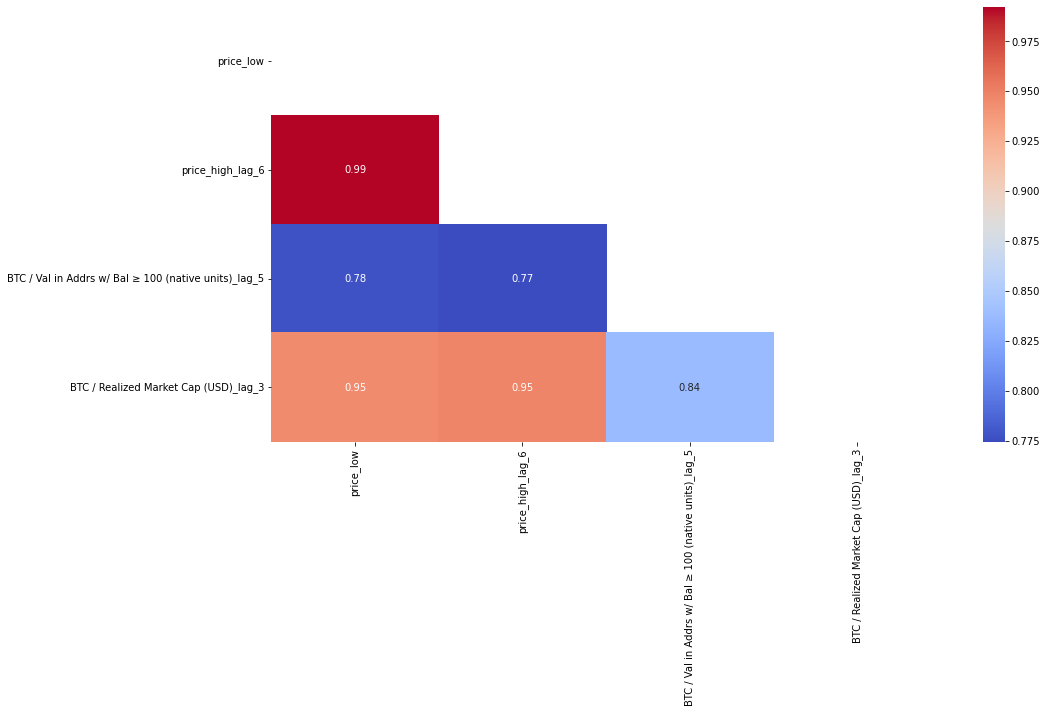

In [ ]:
import seaborn as sns

corr = df_selected_rfecv.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')

we have found only 4 features that are optimal :
- price_low
- price_high_lag_6
- BTC / Val in Addrs w/ Bal ≥ 100 (native units)_lag_5
- BTC / Realized Market Cap (USD)_lag_3

we can also see that the maximum lag is 6 so our window size for buikding the model's dataset will be 6

**Exportation du dataframe :**

In [ ]:
df_selected_rfecv = df_final[['price_low' , 'price_high' , 'BTC / Val in Addrs w/ Bal ≥ 100 (native units)' , 
                       'BTC / Realized Market Cap (USD)' , 'BTC_price']]

In [ ]:
df_selected_rfecv

,price_low,price_high,BTC / Val in Addrs w/ Bal ≥ 100 (native units),BTC / Realized Market Cap (USD),BTC_price
11,340.00,340.00,9.221014e+06,4.380329e+09,340.00
12,340.00,340.00,9.223876e+06,4.370060e+09,340.00
13,340.00,340.00,9.235230e+06,4.362259e+09,340.00
14,340.00,340.00,9.238207e+06,4.354468e+09,340.00
15,340.00,340.00,9.241839e+06,4.355354e+09,340.00
...,...,...,...,...,...
2651,44091.09,44820.58,1.196295e+07,4.637621e+11,44539.42
2652,44437.22,46950.00,1.196435e+07,4.645012e+11,46850.01
2653,46662.28,48240.00,1.196048e+07,4.657595e+11,47144.92
2654,46589.00,48124.94,1.195196e+07,4.667479e+11,47454.19


In [ ]:
df_selected_rfecv.to_csv("btc_final_RFE-CV.csv")
files.download("btc_final_RFE-CV.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>